<a href="https://colab.research.google.com/github/Devansharma/Time_Series_Analysis/blob/master/Time_Series_using_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/nyc_energy_consumption.csv')

In [3]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [4]:
ny_df = df.set_index('timeStamp')

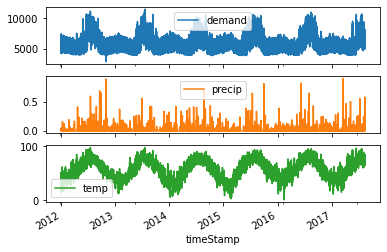

In [5]:
ny_df.plot(subplots=True);

In [6]:
ny_df.resample('D').mean()

,demand,precip,temp
timeStamp,,,
2012-01-01,4954.833333,0.002487,46.510000
2012-01-02,5302.954167,0.000000,40.496667
2012-01-03,6095.512500,0.000000,26.672500
2012-01-04,6336.266667,0.000000,20.585000
2012-01-05,6130.245833,0.000000,33.577500
...,...,...,...
2017-08-08,6471.626042,0.000000,71.039167
2017-08-09,6811.112167,0.047529,73.852500
2017-08-10,5582.297000,0.002033,75.217500


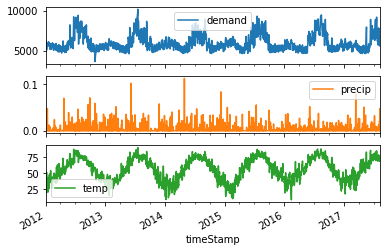

In [8]:
ny_df.resample('D').mean().plot(subplots=True);

In [9]:
ny_df_daily = ny_df.resample('D').mean()

In [10]:
from fbprophet import Prophet

In [11]:
ny_df_final =  ny_df_daily.reset_index()[['timeStamp', 'demand']].rename({'timeStamp':'ds',
                                                                          'demand':'y'}, axis='columns')

In [12]:
ny_df_final

,ds,y
0,2012-01-01,4954.833333
1,2012-01-02,5302.954167
2,2012-01-03,6095.512500
3,2012-01-04,6336.266667
4,2012-01-05,6130.245833
...,...,...
2046,2017-08-08,6471.626042
2047,2017-08-09,6811.112167
2048,2017-08-10,5582.297000
2049,2017-08-11,NaN


In [13]:
train=ny_df_final[(ny_df_final['ds']>= '2012-01-01') & (ny_df_final['ds']<= '2017-04-30')]
test=ny_df_final[(ny_df_final['ds']>'2017-04-30')]

In [14]:
print(train.shape)
print(test.shape)

(1947, 2)
(104, 2)


In [15]:
model = Prophet(interval_width=0.95, yearly_seasonality=True)

In [16]:
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
model.params

OrderedDict([('k', array([[0.08888412]])),
             ('m', array([[0.59346583]])),
             ('delta',
              array([[ 3.14928730e-08,  1.53741876e-07, -1.03044704e-01,
                      -2.11602996e-08,  1.40085597e-07,  1.81802026e-07,
                       1.43803423e-08, -6.11555343e-07,  6.49671582e-08,
                      -2.60011367e-07, -2.43433220e-02, -7.64404754e-02,
                      -2.03269748e-05, -1.67752062e-07,  2.37209776e-01,
                       3.72434388e-07, -1.02857630e-06, -8.82474336e-02,
                      -3.95645665e-02, -1.56344720e-08,  5.48404650e-08,
                       6.61535467e-08,  4.33979100e-03,  2.60526989e-03,
                       1.24238337e-07]])),
             ('sigma_obs', array([[0.04607601]])),
             ('beta',
              array([[-0.03458253, -0.07052008,  0.05760233,  0.04705168, -0.01407221,
                      -0.00500214, -0.00386595, -0.00073581,  0.00241974, -0.00755868,
                 

In [19]:
future = model.make_future_dataframe(periods=104)
future.shape

(2051, 1)

In [20]:
forecast = model.predict(future)

In [21]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2046,2017-08-08,7585.146506,6652.070729,8526.297772
2047,2017-08-09,7574.252310,6652.712684,8594.218564
2048,2017-08-10,7528.960519,6603.709795,8420.654162
2049,2017-08-11,7484.169113,6588.641694,8382.320299
2050,2017-08-12,6909.341600,6000.032399,7856.611436


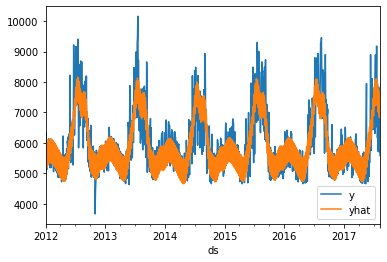

In [22]:
pd.concat([ny_df_final.set_index('ds')['y'], forecast.set_index('ds')['yhat']],
          axis=1).plot()

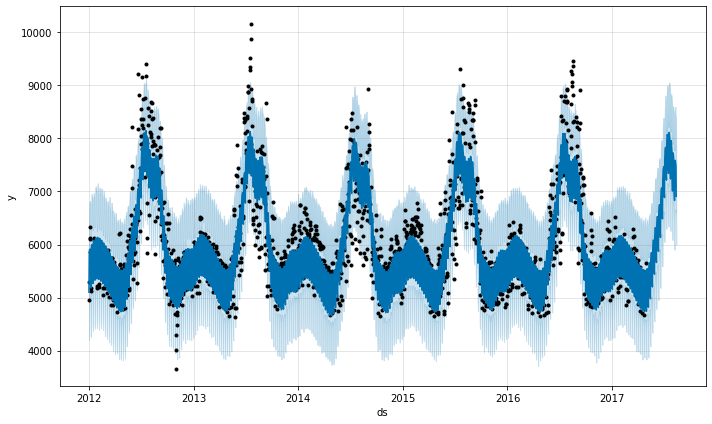

In [23]:
fig1 = model.plot(forecast)

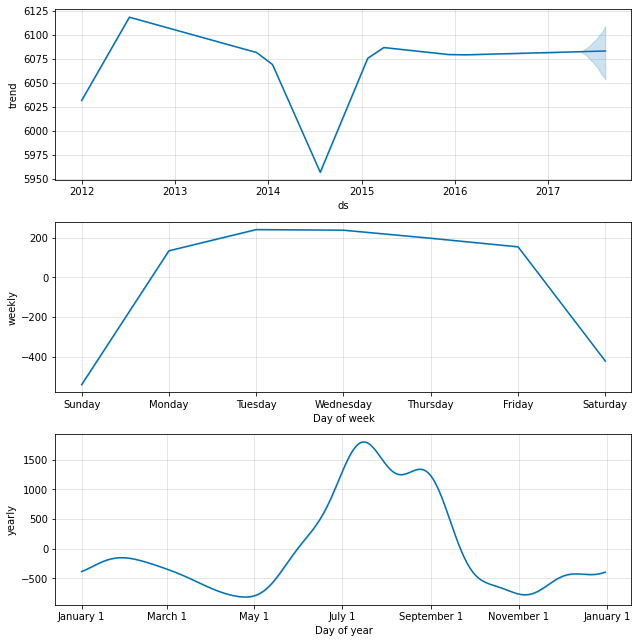

In [24]:
fig2 = model.plot_components(forecast)

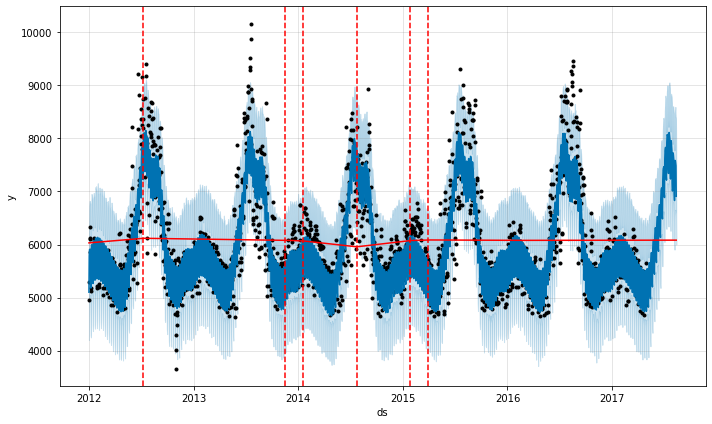

In [25]:
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

In [26]:
deltas = model.params['delta'].mean(0)

In [27]:
deltas

array([ 3.14928730e-08,  1.53741876e-07, -1.03044704e-01, -2.11602996e-08,
        1.40085597e-07,  1.81802026e-07,  1.43803423e-08, -6.11555343e-07,
        6.49671582e-08, -2.60011367e-07, -2.43433220e-02, -7.64404754e-02,
       -2.03269748e-05, -1.67752062e-07,  2.37209776e-01,  3.72434388e-07,
       -1.02857630e-06, -8.82474336e-02, -3.95645665e-02, -1.56344720e-08,
        5.48404650e-08,  6.61535467e-08,  4.33979100e-03,  2.60526989e-03,
        1.24238337e-07])

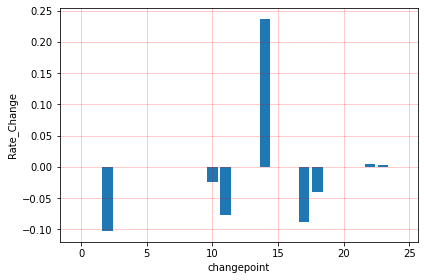

In [29]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)), deltas)
ax.grid(True, which='major', c='red', ls='-', lw=1, alpha=0.2)
ax.set_ylabel('Rate_Change')
ax.set_xlabel('changepoint')
fig.tight_layout()

In [30]:
model.changepoints

62     2012-03-03
124    2012-05-04
187    2012-07-06
249    2012-09-06
311    2012-11-07
373    2013-01-08
436    2013-03-12
498    2013-05-13
560    2013-07-14
622    2013-09-14
685    2013-11-16
747    2014-01-17
809    2014-03-20
871    2014-05-21
934    2014-07-23
996    2014-09-23
1058   2014-11-24
1120   2015-01-25
1183   2015-03-29
1245   2015-05-30
1307   2015-07-31
1369   2015-10-01
1432   2015-12-03
1494   2016-02-03
1556   2016-04-05
Name: ds, dtype: datetime64[ns]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


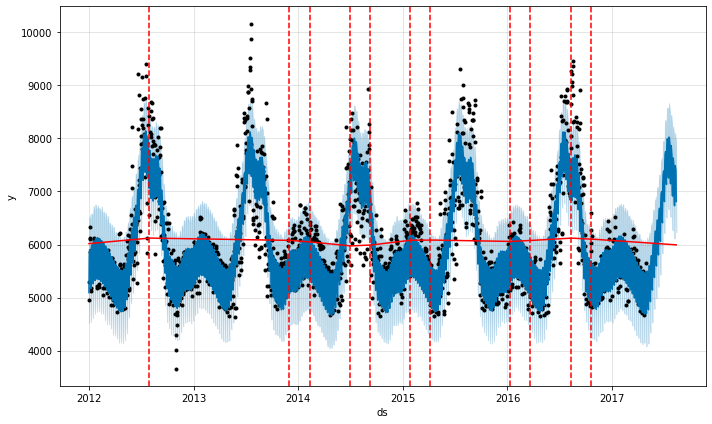

In [34]:
pro_change = Prophet(changepoint_range=0.9, yearly_seasonality=True)
forecast = pro_change.fit(train).predict(future)
fig = pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

In [35]:
from fbprophet.plot import plot_plotly
import plotly.offline as py

In [38]:
fig = plot_plotly(model, forecast)
py.iplot(fig)

In [39]:
from fbprophet.diagnostics import cross_validation
cv_results = cross_validation(model=model, initial='731 days', horizon='365 days')

INFO:fbprophet:Making 5 forecasts with cutoffs between 2014-05-01 00:00:00 and 2016-04-30 00:00:00


In [40]:
cv_results.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-05-02,5560.399158,4719.013088,6458.666450,5460.325000,2014-05-01
1,2014-05-03,4970.368653,4123.667640,5811.021665,4893.683333,2014-05-01
2,2014-05-04,4846.526492,4038.722695,5652.510668,4764.137500,2014-05-01
3,2014-05-05,5527.405000,4617.911721,6376.106823,5406.762500,2014-05-01
4,2014-05-06,5622.303858,4773.404534,6471.844193,5409.750000,2014-05-01


In [41]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(cv_results)
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days 12:00:00,251429.065746,501.427029,405.741907,0.072931,0.065579,0.884615
1,37 days 00:00:00,258154.308609,508.088879,413.132705,0.074218,0.066087,0.879121
2,37 days 12:00:00,260458.355734,510.351208,416.504551,0.074798,0.066775,0.879121
3,38 days 00:00:00,263245.456254,513.074513,419.608202,0.075062,0.067182,0.879121
4,38 days 12:00:00,266934.102525,516.656658,424.824052,0.075894,0.067543,0.879121
...,...,...,...,...,...,...,...
653,363 days 00:00:00,260005.135786,509.906987,446.400124,0.082383,0.081701,0.983516
654,363 days 12:00:00,261690.499217,511.556936,447.442090,0.082567,0.082034,0.983516
655,364 days 00:00:00,266012.437438,515.763936,450.969835,0.083405,0.082787,0.978022
656,364 days 12:00:00,266053.564909,515.803805,450.639292,0.083380,0.082787,0.978022
